In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!python -m pip install --upgrade pip

!pip install tensorflow==2.3.1

!pip install tensorboard==2.4.1
!pip install torch  #YOLOv5 runs on top of PyTorch, so we need to import it to the notebook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1)
ERROR: No matching distribution found for tensorflow==2.3.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 39.4 M

In [3]:
import torch # YOLOv5 implemented using pytorch

In [4]:
from IPython.display import Image #this is to render predictions

In [5]:
%cd /content/drive/MyDrive/yolo5

/content/drive/MyDrive/yolo5


In [ ]:
#!git clone https://github.com/ultralytics/yolov5

In [8]:
%cd /content/drive/MyDrive/yolo5/yolov5

/content/drive/MyDrive/yolo5/yolov5


In [6]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


# Divide the dataset in train and val folder.

In [ ]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '/content/drive/MyDrive/yolo5/dt/images/train'
valPath = '/content/drive/MyDrive/yolo5/dt/images/val'
crsPath = '/content/drive/MyDrive/yolo5/data' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are  : ",countForTrain)
print("Validation images are: ",countForVal)


training images are  :  575
Validation images are:  143


In [ ]:
trainimagePath = '/content/drive/MyDrive/yolo5/dt/images/train'
trainlabelPath = '/content/drive/MyDrive/yolo5/dt/labels/train'
valimagePath = '/content/drive/MyDrive/yolo5/dt/images/val'
vallabelPath = '/content/drive/MyDrive/yolo5/dt/labels/val'

#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))

    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#cycle for test dir
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))

    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath)

'/content/drive/MyDrive/yolo5/dt/images/val/data'

# Create dataset.yaml

### move the dataset’s dataset.yaml file to the /content/yolov5/data directory.
### This file contains information required by YOLO to train the model on the custom data.

![image.png](attachment:image.png)

In [ ]:
!python train.py --img 416 --batch 16 --epochs 110 --data '/content/drive/MyDrive/yolo5/dt/dataset.yaml' --weights yolov5x.pt --cache

2024-01-22 09:09:09.169808: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 09:09:09.169865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 09:09:09.171252: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x.pt, cfg=, data=/content/drive/MyDrive/yolo5/dt/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=110, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync

In [ ]:
#%load_ext tensorboard
#%tensorboard --logdir runs

## Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label

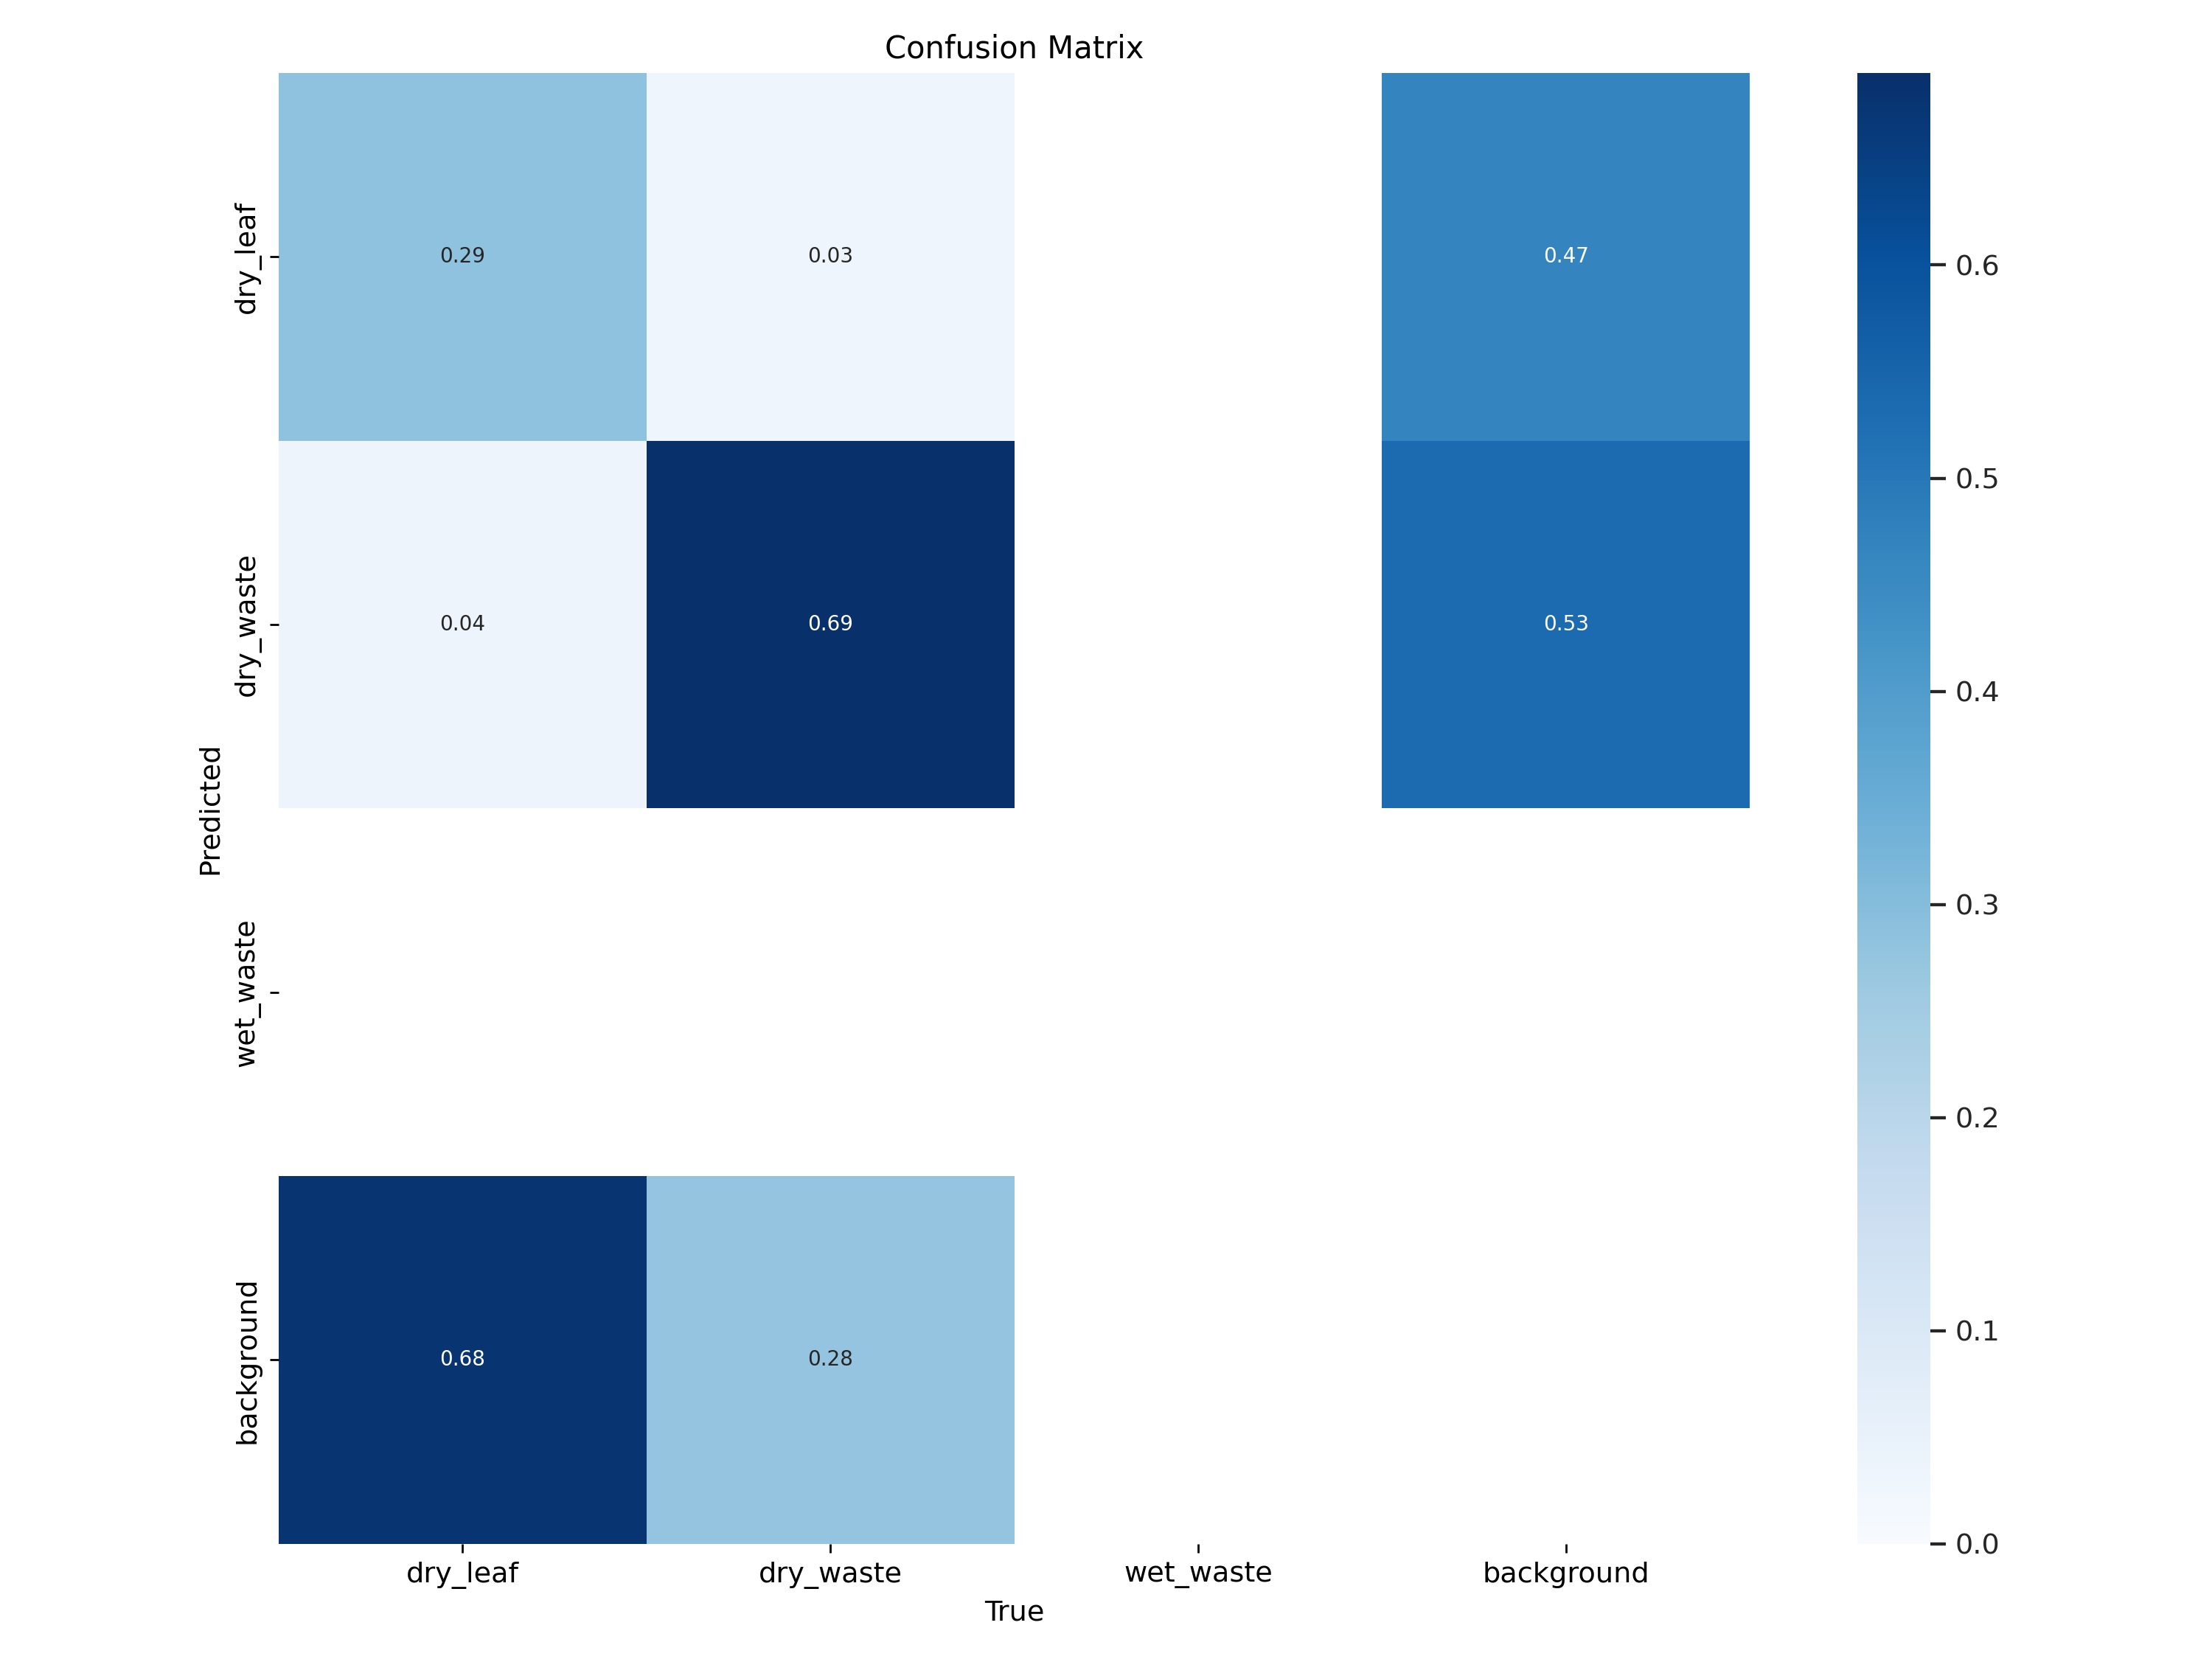

In [ ]:
Image(filename='runs/train/exp2/confusion_matrix.png',width=800)

#Detection

You’ll be implementing the detect.py script with the best.pt weights and image dimensions of 416x416 pixels (it’s really important to comply with that). The results will be saved to runs/detect/exp. To display the results, run the following code:

In [ ]:
#%cd '/content/drive/MyDrive/yolo/yolov5/yolov5'

!python detect.py --source /content/drive/MyDrive/yolo5/test --weights '/content/drive/MyDrive/yolo5/yolov5/runs/train/exp2/weights/best.pt'

detect: weights=['/content/drive/MyDrive/yolo5/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/yolo5/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-232-g1c60c535 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 322 layers, 86186872 parameters, 0 gradients, 203.8 GFLOPs
image 1/4 /content/drive/MyDrive/yolo5/test/IMG20240115124946.jpg: 480x640 1 dry_leaf, 2 dry_wastes, 73.0ms
image 2/4 /content/drive/MyDrive/yolo5/test/IMG20240116161515.jpg: 480x640 20 dry_leafs, 4 dry_wastes, 67.9ms
image 3/4 /content/drive/MyDrive/yolo5/test/IMG20240116161

#Show detection image result


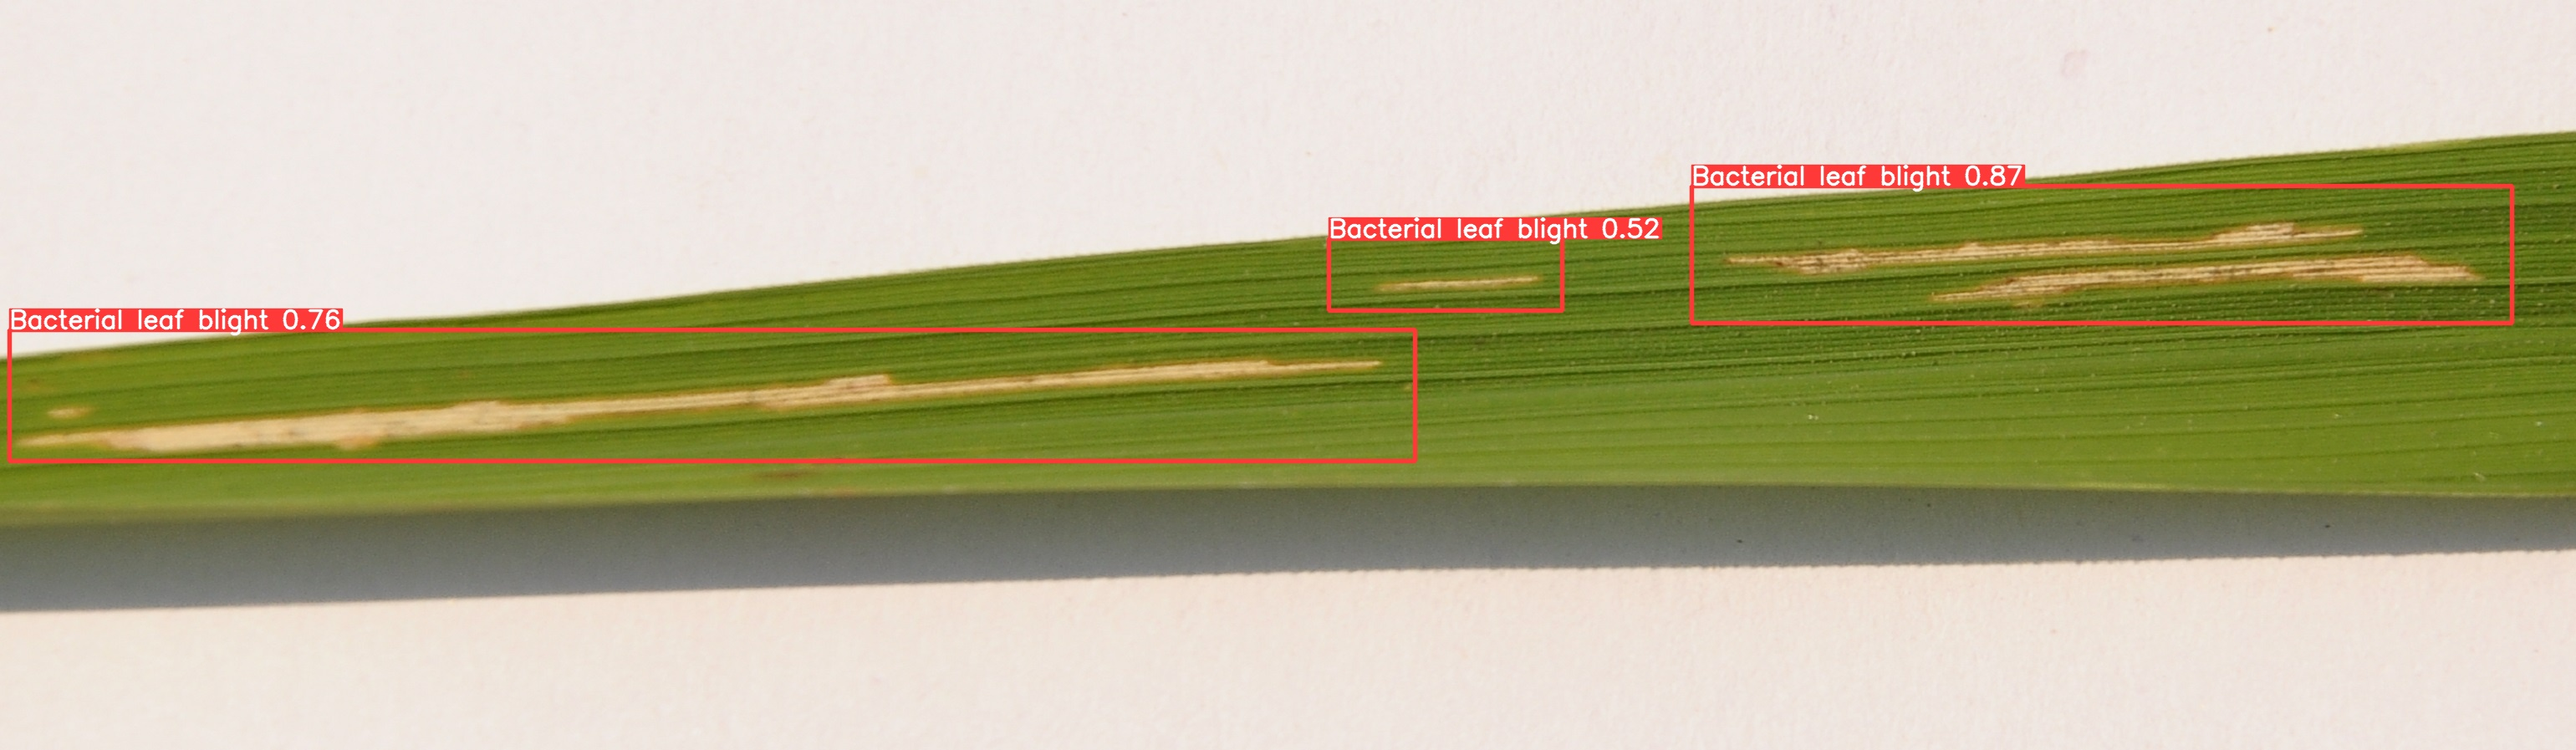

In [ ]:
Image(filename='runs/detect/exp/DSC_0389.JPG',width=800)

#pt to pb (tflite)

In [ ]:
#!python export.py --weights runs/train/exp/weights/best.pt --include tflite --int8 --img 416 --data /content/drive/MyDrive/yolo5/dt/dataset.yaml

In [10]:
#2

!python export.py --weights /content/drive/MyDrive/yolo5/yolov5/runs/train/exp2/weights/best.pt --include tflite --img 416

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/yolo5/yolov5/runs/train/exp2/weights/best.pt'], imgsz=[416], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-232-g1c60c535 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 322 layers, 86186872 parameters, 0 gradients, 203.8 GFLOPs

PyTorch: starting from /content/drive/MyDrive/yolo5/yolov5/runs/train/exp2/weights/best.pt with output shape (1, 10647, 8) (165.0 MB)
2024-01-22 14:09:38.847158: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 14:09:38.847210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607]